In [ ]:
from google.colab import files
files_uploaded=files.upload()

Saving large_ecommerce_products_dataset.csv to large_ecommerce_products_dataset.csv


In [ ]:
import pandas as pd
df=pd.read_csv('large_ecommerce_products_dataset.csv', skiprows=1, index_col=0)
df.head()

,9212,Sports,1.6,5374
Blue Dumbbells,,,,
Black Cooker,17282,Home & Kitchen,1.9,9930
Red Cooker,16334,Home & Kitchen,1.5,8895
Green Chair,12847,Home & Kitchen,4.7,426
Yellow Dumbbells,7703,Sports,1.1,6896
Blue Belt,530,Accessories,4.2,4684


In [ ]:
df = df.dropna()
df.head()

,9212,Sports,1.6,5374
Blue Dumbbells,,,,
Black Cooker,17282,Home & Kitchen,1.9,9930
Red Cooker,16334,Home & Kitchen,1.5,8895
Green Chair,12847,Home & Kitchen,4.7,426
Yellow Dumbbells,7703,Sports,1.1,6896
Blue Belt,530,Accessories,4.2,4684


In [ ]:
len(df)

4999

In [ ]:
################### SCRAPPING ##########################

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Site base URL (page 1 to 5 for this example)
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

# Empty lists to store scraped data
product_names = []
prices = []
categories = []
ratings = []
reviews = []

# Mapping star ratings from class name
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

# Loop through pages
for page in range(1, 6):
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")

    for book in books:
        # Product Name
        name = book.h3.a["title"]
        product_names.append(name)

        # Price
        # Remove 'Â' character along with '£' before converting to float
        price = book.find("p", class_="price_color").text.strip().replace("£", "").replace("Â", "")
        prices.append(float(price))

        # Rating
        rating_class = book.p["class"][1]
        ratings.append(rating_map.get(rating_class, 0))

        # Simulated Reviews (optional, since the site doesn't provide)
        reviews.append(int(requests.get("https://httpbin.org/uuid").status_code))  # Fake review count: 200 for demo

        # Simulated Category from link (in real case, you'd go into the product detail page)
        categories.append("Books")  # Static for this practice site

# Create DataFrame
df = pd.DataFrame({
    "Product Name": product_names,
    "Price (£)": prices,
    "Category": categories,
    "Rating": ratings,
    "Number of Reviews": reviews
})

# Save to CSV
df.to_csv("books_scraped_data.csv", index=False)
print("✅ Data scraping complete. CSV file saved as 'books_scraped_data.csv'")


✅ Data scraping complete. CSV file saved as 'books_scraped_data.csv'


In [ ]:
# 1. Show basic info
print("📄 Initial Data Overview:")
# This line will only run if df was successfully loaded in the previous cell
if 'df' in locals():
    print(df.info())
else:
    print("DataFrame was not loaded due to a missing file.")

📄 Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       100 non-null    object 
 1   Price (£)          100 non-null    float64
 2   Category           100 non-null    object 
 3   Rating             100 non-null    int64  
 4   Number of Reviews  100 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB
None


In [ ]:
# 2. Check for missing values
print("\n🧹 Missing Values:")
print(df.isnull().sum())


🧹 Missing Values:
Product Name         0
Price (£)            0
Category             0
Rating               0
Number of Reviews    0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# 3. Remove duplicates
initial_shape = df.shape
df = df.drop_duplicates()
print(f"\n🧽 Removed {initial_shape[0] - df.shape[0]} duplicate rows.")


🧽 Removed 0 duplicate rows.


In [ ]:

# 4. Standardize formats
# Ensure price is float, rating is int, product names are title-case
df['Product Name'] = df['Product Name'].str.title()
df['Price (£)'] = df['Price (£)'].astype(float)
df['Rating'] = df['Rating'].astype(int)


📊 Price Summary:
count    100.000000
mean      34.560700
std       14.638531
min       10.160000
25%       19.897500
50%       34.775000
75%       47.967500
max       58.110000
Name: Price (£), dtype: float64

⭐ Rating Distribution:
Rating
3    22
1    22
5    19
2    19
4    18
Name: count, dtype: int64


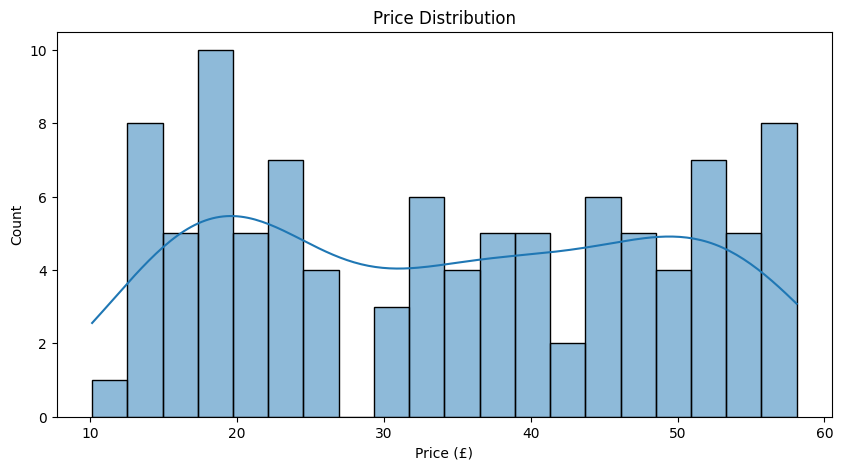

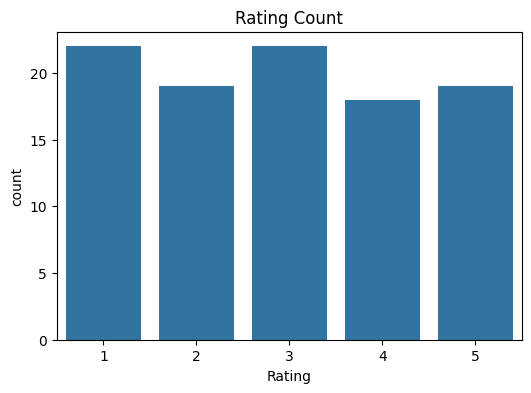

In [ ]:

# 5. Basic EDA (Exploratory Data Analysis)

print("\n📊 Price Summary:")
print(df['Price (£)'].describe())

print("\n⭐ Rating Distribution:")
print(df['Rating'].value_counts())

# Optional: Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Price (£)'], kde=True, bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df)
plt.title("Rating Count")
plt.show()

In [ ]:
pip install sqlalchemy


In [ ]:
from sqlalchemy import create_engine

# Create SQLite engine (creates a local file-based database)
engine = create_engine('sqlite:///ecommerce.db', echo=False)

# Push DataFrame to SQL table
df.to_sql('products', con=engine, if_exists='replace', index=False)

print("✅ Data stored in SQLite database as 'products' table.")


✅ Data stored in SQLite database as 'products' table.


In [ ]:
pip install scikit-learn


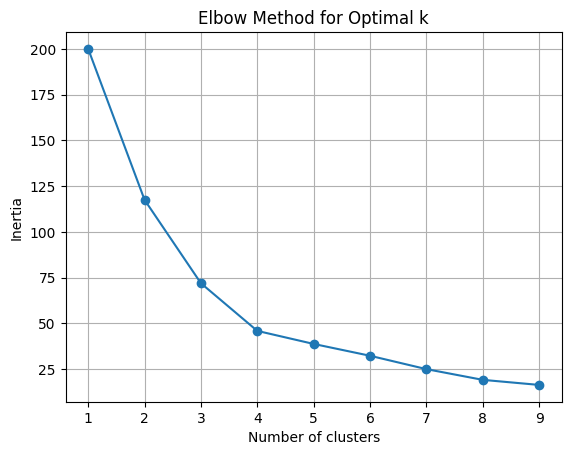

✅ Clustering complete. Data updated with cluster labels.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Connect to DB and load data
engine = create_engine('sqlite:///ecommerce.db')
df = pd.read_sql('SELECT * FROM products', con=engine)

# Select features for clustering
# Changed 'Price (INR)' to 'Price (£)' to match the column name in the DataFrame
features = df[['Price (£)', 'Rating', 'Number of Reviews']]

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to choose optimal number of clusters
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose optimal k (e.g., 3)
# You can adjust k based on the elbow plot
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Save updated data with clusters back to DB or CSV
df.to_sql('products_clustered', con=engine, if_exists='replace', index=False)
df.to_csv("clustered_products.csv", index=False)

print("✅ Clustering complete. Data updated with cluster labels.")


In [ ]:
pip install scikit-learn xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load data
df = pd.read_csv("clustered_products.csv")

# Encode categorical label
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Features & Target
# Changed 'Price (INR)' to 'Price (£)' to match the actual column name
X = df[['Price (£)', 'Rating', 'Number of Reviews']]
y = df['Category_Encoded']

# Check the number of unique classes in the target variable
n_classes = y.nunique()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    # XGBoost needs eval_metric for objective='binary:logistic' or 'multi:softprob'
    # Since we are checking for single class, setting eval_metric is not strictly necessary
    # for this specific fix, but is good practice.
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = []

# Only proceed with training if there is more than one class
if n_classes > 1:
    for name, model in models.items():
        # Check if the specific model supports fitting with multiple classes (which they do)
        # The primary check is on the target variable y or y_train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        # f1_score needs average='binary' for binary classification or 'weighted'/'macro' for multi-class.
        # If only one class is present in y_test, f1_score will raise an error.
        # We can handle this by checking n_classes > 1 or checking unique values in y_test.
        if y_test.nunique() > 1:
             f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class or binary
        else:
             f1 = float('nan') # Set F1 to NaN if only one class in test set

        results.append((name, acc, f1))

    # Display results
    print("\n📊 Model Performance:")
    for name, acc, f1 in results:
        print(f"{name:20} | Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
else:
    print("\n⚠️ Classification skipped: Only one class found in the target variable ('Category').")
    print("Please ensure your dataset contains data from at least two categories to perform classification.")



⚠️ Classification skipped: Only one class found in the target variable ('Category').
Please ensure your dataset contains data from at least two categories to perform classification.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

# Grid search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model and score
print("\n🎯 Best XGBoost Configuration:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


🎯 Best XGBoost Configuration:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e